# Load Data

In [1]:
import glob
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rasterio 
import pdb #for adding breakpoints to code
from sklearn.model_selection import train_test_split


# Load Dataset into Memory


In [ ]:
code r'C:\Users\Usselman Lab\VNA_model'


In [3]:
print('Hello World!')


print('This shouldnt printt')

Hello World!
This shouldnt printt


In [4]:
# Specify the path to the root directory
root_directory = r'C:\Users\Usselman Lab\VNA_model'  # Change this to the actual path
# Use glob to get paths of all text files in the subdirectories
text_file_paths = glob.glob(os.path.join(root_directory, '*', '*.txt'))

# Print the list of file paths
#for file_path in text_file_paths:
    #print(file_path)

# Creates an empty list to store the X data in
X = []

# Creates an empty list to store the Y data in (Y data is just all of the different 15 samples)
Y = []

for file_path in text_file_paths:
    X.append(pd.read_csv(file_path, sep = '\t', skiprows = 16).drop(columns = ['PNT','FREQ1.GHZ','FREQ2.GHZ', 'LOGMAG2', 'FREQ3.GHZ', 'FREQ4.GHZ','LOGMAG3', 'LOGMAG4']).to_numpy())
    # Grab the folder name as a label for each array
    folder_name = os.path.basename(os.path.dirname(file_path))
    Y.append(folder_name)
print(X)
print ((hex(id(Y))))
print (id(Y))

[array([[-48.02918],
       [-56.71357],
       [-55.77712],
       ...,
       [-14.01805],
       [-13.94911],
       [-13.90626]]), array([[-47.76894],
       [-55.87375],
       [-54.69296],
       ...,
       [-13.9349 ],
       [-13.89715],
       [-13.84063]]), array([[-48.49855],
       [-58.22115],
       [-56.73051],
       ...,
       [-13.70484],
       [-13.63332],
       [-13.60206]]), array([[-47.7069 ],
       [-55.90852],
       [-54.77921],
       ...,
       [-13.91804],
       [-13.87657],
       [-13.86434]]), array([[-47.87665],
       [-55.99292],
       [-54.69243],
       ...,
       [-14.01236],
       [-13.93321],
       [-13.86292]]), array([[-47.77352],
       [-56.09897],
       [-54.51368],
       ...,
       [-13.97083],
       [-13.8789 ],
       [-13.81583]]), array([[-47.56761],
       [-56.39067],
       [-54.49321],
       ...,
       [-13.99095],
       [-13.89951],
       [-13.78834]]), array([[-47.76024],
       [-56.17695],
       [-54.73806],
 

In [5]:
# check if any array is not 16001 x 2...
for x in X:
    if x.shape != (16001, 2): print('This example is not the correct shape')

This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example is not the correct shape
This example

In [6]:
from pympler import asizeof
print (id (Y))
# Replace "0x1ceb5f50900" with the actual memory address you want to inspect
memory_address = int(((hex(id(Y)))), 16)

# Use pympler's asizeof to get the size of the object at the specified memory address
object_size = asizeof.asizeof(memory_address)

print(f"Size of object at memory address {hex(memory_address)}: {object_size} bytes")


2546504489344
Size of object at memory address 0x250e77ed980: 32 bytes


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
{'HB': 0, 'Syn6Sal': 1, 'ETOH': 2, 'HSF': 3, 'ZMTX': 4, 'SynSal': 5, 'Tube': 6, 'H2O': 7, '70ETOH': 8, 'Glucose': 9, 'CPW': 10, 'ISO': 11, 'PBS': 12, 'BSA': 13, 'AML': 14}
[[[-48.44904]
  [-53.03079]
  [-49.44479]
  ...
  [-12.875  ]
  [-12.8524 ]
  [-12.771  ]]

 [[-48.52291]
  [-53.04272]
  [-49.67572]
  ...
  [-12.87427]
  [-12.81321]
  [-12.78167]]

 [[-48.35043]
  [-54.5358 ]
  [-51.09816]
  ...
  [-12.90026]
  [-12.82662]
  [-12.78407]]

 ...

 [[-48.26485]
  [-54.41624]
  [-50.80593]
  ...
  [-12.85188]
  [-12.8132 ]
  [-12.76269]]

 [[-48.24753]
  [-54.53325]
  [-51.17077]
  ...
  [-12.89205]
  [-12.82081]
  [-12.7539 ]]

 [[-48.43391]
  [-54.49741]
  [-50.89611]
  ...
  [-12.88236]
  [-12.81063]
  [-12.74766]]]


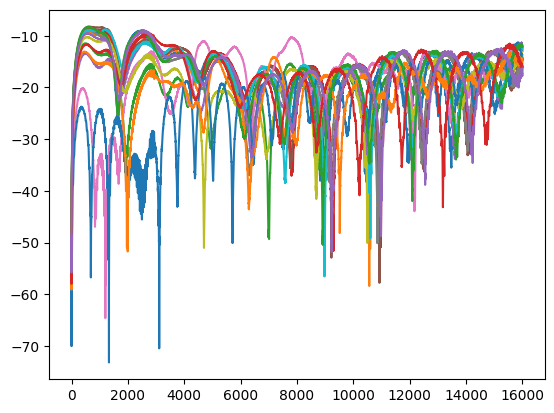

In [25]:
# Converting the 3D array to a 2D numpy array, best way to run data into a NN
X_data = np.array(X)
X_data.shape

# Picks out the unique names out of the list
class_names = list(set(Y))

# Turning each file name into a specific number
labeled_classes = {class_name: label for label, class_name in enumerate(class_names)}

# Takes the numbers from the last step and puts them into a numpy array
Y_data = np.array([labeled_classes[label] for label in Y])
Y_num = np.unique(Y_data)
print(Y_num)


# print(f'The shape of dataY is {X_data.shape}')
# print(labeled_classes)
connectingXandY = {}
for label_index in range(15):
    class_data = X_data[Y_data == label_index]
    connectingXandY.update({label_index: class_data})
    plt.plot(class_data[:,:,0].mean(axis = 0), label = class_names[label_index])

print(labeled_classes)
#print (class_data[0])
output_file_path = 'output.txt'

with open(output_file_path, 'w') as file:
    for key, value in connectingXandY.items():
        file.write(f"Class {key}:\n")
        file.write(np.array2string(value, separator=', '))
        file.write("\n\n")

print(f'Data has been written to {output_file_path}')


#print(connectXandY.keys())

# LOAD THEN SPLIT DATA INTO PYTORCH

In [17]:
# select which columns to use
columns = [0]
selectedX = X_data[:, :, columns]

print("The data type of the array is " , selectedX.dtype, " and if there's unique data values:" ,  np.unique(selectedX.dtype), sep = '\t', end = "! '\t'",)
# Check if the array contains different data types
has_mixed_types = len(np.unique(selectedX.dtype)) > 1

if has_mixed_types:
    print("The array contains different data types.")
else:
    print("The array has a consistent data type.")
print(f'The shape of dataX is {selectedX.shape}')
print(f'The shape of dataY is {Y_num.shape}')
print(selectedX)
# split data into train and test sets stratified by class label
#trainX, testX, trainY, testY = train_test_split(selectedX[None, None, columns], Y_num, test_size = 0.2, random_state = 0, stratify = Y_data)

# training data histogram
#plt.hist([trainY, testY], bins = 15, label = ['Train Set', 'Test Set'])
#plt.title('Histogram of Class Labels in Data Splits')
#plt.legend()

The data type of the array is 	float64	 and if there's unique data values:	[dtype('float64')]! '	'The array has a consistent data type.
The shape of dataX is (1500, 16001, 1)
The shape of dataY is (15,)
[[[-48.02918]
  [-56.71357]
  [-55.77712]
  ...
  [-14.01805]
  [-13.94911]
  [-13.90626]]

 [[-47.76894]
  [-55.87375]
  [-54.69296]
  ...
  [-13.9349 ]
  [-13.89715]
  [-13.84063]]

 [[-48.49855]
  [-58.22115]
  [-56.73051]
  ...
  [-13.70484]
  [-13.63332]
  [-13.60206]]

 ...

 [[-48.29826]
  [-58.0038 ]
  [-56.402  ]
  ...
  [-12.26346]
  [-12.16898]
  [-12.10763]]

 [[-48.49971]
  [-57.36403]
  [-56.29771]
  ...
  [-12.25821]
  [-12.19665]
  [-12.12894]]

 [[-48.27696]
  [-57.29523]
  [-55.73777]
  ...
  [-12.24493]
  [-12.18369]
  [-12.09378]]]


# Make NN

In [9]:
#%%
import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import SubsetRandomSampler


In [10]:
#myList = ([[True, False], [False, False]], dtype = torch.bool)
tensor = torch.zeros([2, 4], dtype = torch.bool)
tensor[1]
tensor[1][1]
tensor[1] = True
tensor[1]

tensor([True, True, True, True])

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print("Using device:", device)


#convert numpy array to torch tensor
torch_selected_X = torch.from_numpy(selectedX)
torch_Y_num = torch.from_numpy(Y_num)
print(torch_selected_X.size())
print(torch_selected_X[0][2])
xx = torch.reshape(torch_selected_X, (1500, 16001))
print(xx.size())
#https://pytorch.org/docs/stable/generated/torch.from_numpy.html!!!!!!!!!!!
#X_train, X_test, y_train, y_test = train_test_split(torch_selected_X, torch_Y_num, train_size=0.8, shuffle=True)


#set seed to have recreate same groupings 
torch.manual_seed(50)

#get amount of data per data type to use
torch_selected_X_range = int(len(xx))
train_range = int(0.8 * torch_selected_X_range)
test_range = torch_selected_X_range - train_range

torch_selected_Y_range = int(len(torch_Y_num))
train_range_1 = int(0.8 * torch_selected_Y_range)
test_range_1 = torch_selected_Y_range - train_range

#NEED TO SPLIT DATA USING TORCH RIGHT NOW ALL PULLING FROM SAME AREA

train_sampler = SubsetRandomSampler(range(train_range))
test_sampler = SubsetRandomSampler(range(train_range, torch_selected_X_range))

#split the data into trainset and tests based on data amount per type
train_set, test_set = torch.utils.data.random_split(torch_selected_X,(train_range,test_range))
#https://pytorch.org/docs/stable/data.html

#instaniate dataloader objects whilst loading our data into our dataloader objects... trainset IS OBJECT! not actual data
trainset_loader = torch.utils.data.DataLoader(train_set, batch_size= 3, shuffle=True)
testset_loader = torch.utils.data.DataLoader(test_set, batch_size= 3, shuffle=True)

for data in trainset_loader:
    x, y = data
    x, y = torch_selected_X[].to(device), torch_Y_num.to(device)
for data in testset_loader:
    x, y = data
    x, y = torch_selected_X.to(device), torch_Y_num.to(device)
#should be x.to(device).........?
#should be X = train_sampler.to(device) in trainset_loader object but can't access subset. Batch size 2 is also required so our code is wrong.
print(f'the number of objects in trainset is: {len(trainset_loader)}')
print(f'the number of objects in test set is: {len(testset_loader)}')
print(X)



Using device: cuda
torch.Size([1500, 16001, 1])
tensor([-55.7771], dtype=torch.float64)
torch.Size([1500, 16001])


ValueError: too many values to unpack (expected 2)

In [ ]:
# i put all of the NN stuff in the randomNN file, gonna try and start from scratch and maybe follow a tutorial. 
#Im still worried that something is wrong with the way our data is set up, but ill be back tomorrow to work on this

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
class Model(nn.Module):
    #Input Layer --> hidden layer (certain # of neurons) --> output (15 classes)
    #in_features - what we are putting into the model, i made the assumption that it is the 2 logmag values, in the tutorial, 
    #hes doing flowers and his in features are 4 diff characterists of flowers

    def __init__(self, in_features= 16001,  h1= 200, h2 = 20, out_features=15): #3 sets of features? 2 x 15 x frequency? #the h1, h2 are just hidden layers, the output features are just the 0-14, and the input is just whatever we decide we need to be the input
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h1, out_features)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [ ]:
torch.manual_seed(41)
model = Model()

In [ ]:
print(f'{X.view(-1, 1, 16001).to(torch.float32)}')
transposed = torch.transpose(X, 0, 1)
print(transposed)



AttributeError: 'list' object has no attribute 'view'

In [ ]:
# Define optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
if hasattr(model, 'fc2'):
    print('has fc1')
# Training loop
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    i = 1
    for data in trainset_loader:
        inputs = torch.cat((data.x, torch_Y_num), dim=1)
        # Preprocess your 3D input data if needed
        #https://discuss.pytorch.org/t/too-many-values-to-unpack-expected-2/100431
        inputs = inputs.view(-1, 1, 16001).to(torch.float32)
        #if i > 1:
       #     torch.transpose(inputs, 0, 1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    #i = 0
    print(f'Epoch {epoch + 1}, Loss: {running_loss / len(trainset_loader)}')



has fc1


AttributeError: 'Tensor' object has no attribute 'x'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
index = 1

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

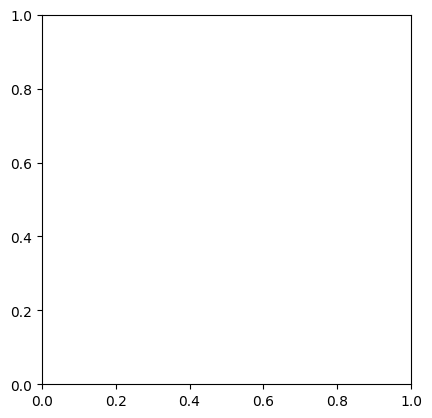

In [ ]:
plt.imshow(X[1])